# Relax Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('takehome_users.csv', encoding='latin-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df.shape

(12000, 10)

In [4]:
engage = pd.read_csv('takehome_user_engagement.csv')
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
engage.shape

(207917, 3)

In [6]:
engage.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [7]:
engage.time_stamp = pd.to_datetime(engage.time_stamp)

In [8]:
engage.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [9]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
engage.time_stamp = engage.time_stamp.dt.floor('d').astype(np.int64)
engage.head()

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1


In [11]:
engage = engage.sort_values(['user_id','time_stamp']).drop_duplicates()
engage.head()

,time_stamp,user_id,visited
0,1398124800000000000,1,1
1,1384473600000000000,2,1
2,1385683200000000000,2,1
3,1386547200000000000,2,1
4,1387929600000000000,2,1


In [12]:
a = engage.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()-a.min())).dt.days

In [13]:
c = b[b < 8].index.get_level_values('user_id').to_list()
len(set(c))

1656

In [14]:
c_list = list(set(c))
c_list.sort()
active = pd.DataFrame(c_list, columns=['user_id'])
active.head()

,user_id
0,2
1,10
2,20
3,33
4,42


In [15]:
active['active']=1
active.head()

,user_id,active
0,2,1
1,10,1
2,20,1
3,33,1
4,42,1


In [16]:
df = df.merge(active, how='left', left_on='object_id', right_on='user_id')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,active
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN


In [17]:
df.shape

(12000, 12)

In [18]:
df.drop('user_id', axis=1, inplace=True)

In [19]:
#Prep the dataframe.
df.drop(['name', 'email', 'last_session_creation_time'], axis=1, inplace=True)

In [20]:
df.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,NaN


In [21]:
df.fillna(value={'active': 0}, inplace=True)

In [22]:
df.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0


In [23]:
#Get dummies.
pd.get_dummies(df, columns=['creation_source'])

,object_id,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,0,0,1,316.0,1.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,0,0,1,5151.0,0.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,0,0,193,5240.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,0,0,89,8263.0,0.0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,0,0,200,NaN,0.0,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,1,1,83,8074.0,0.0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,0,0,6,NaN,0.0,0,0,1,0,0


In [24]:
df.index = df.object_id

In [26]:
df.drop('object_id', axis=1, inplace=True)

In [34]:
df.isna().sum()

creation_time                    0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
active                           0
dtype: int64

In [37]:
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [43]:
temp = df[df.invited_by_user_id.isin([10741, 2527, 2308, 1525, 11770])]
temp.org_id.value_counts()

100    13
57     12
94     11
10     11
5      11
Name: org_id, dtype: int64

In [44]:
df[df.invited_by_user_id.isna()]

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
object_id,,,,,,,
7,2012-12-16 13:24:32,SIGNUP,0,1,37,NaN,0.0
8,2013-07-31 05:34:02,PERSONAL_PROJECTS,1,1,74,NaN,0.0
9,2013-11-05 04:04:24,PERSONAL_PROJECTS,0,0,302,NaN,0.0
11,2013-12-26 03:55:54,SIGNUP,0,0,69,NaN,0.0
14,2012-10-11 16:14:33,SIGNUP,0,0,0,NaN,0.0
...,...,...,...,...,...,...,...
11993,2013-03-28 23:24:21,PERSONAL_PROJECTS,0,0,281,NaN,0.0
11995,2013-10-21 13:33:17,PERSONAL_PROJECTS,0,0,0,NaN,0.0
11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,0.0


In [45]:
df.fillna(value={'invited_by_user_id': 0}, inplace=True)

In [46]:
df.head()

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
object_id,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0


In [47]:
df.tail()

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
object_id,,,,,,,
11996,2013-09-06 06:14:15,ORG_INVITE,0,0,89,8263.0,0.0
11997,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,0.0
11998,2014-04-27 12:45:16,GUEST_INVITE,1,1,83,8074.0,0.0
11999,2012-05-31 11:55:59,PERSONAL_PROJECTS,0,0,6,0.0,0.0
12000,2014-01-26 08:57:12,SIGNUP,0,1,0,0.0,0.0


In [49]:
df['invited_by_user'] = np.sign(df.invited_by_user_id)
df.head()

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited_by_user
object_id,,,,,,,,
1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0,1.0
2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0,1.0
3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0,1.0
4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0,1.0
5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0,1.0


In [51]:
df = pd.get_dummies(df, columns=['creation_source'])
df.head()

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1.0,1,0,0,0,0
2,2013-11-15 03:45:04,0,0,1,316.0,1.0,1.0,0,1,0,0,0
3,2013-03-19 23:14:52,0,0,94,1525.0,0.0,1.0,0,1,0,0,0
4,2013-05-21 08:09:28,0,0,1,5151.0,0.0,1.0,1,0,0,0,0
5,2013-01-17 10:14:20,0,0,193,5240.0,0.0,1.0,1,0,0,0,0


In [52]:
df.drop('invited_by_user_id', axis=1)

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,0.0,1.0,1,0,0,0,0
2,2013-11-15 03:45:04,0,0,1,1.0,1.0,0,1,0,0,0
3,2013-03-19 23:14:52,0,0,94,0.0,1.0,0,1,0,0,0
4,2013-05-21 08:09:28,0,0,1,0.0,1.0,1,0,0,0,0
5,2013-01-17 10:14:20,0,0,193,0.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,0,0,89,0.0,1.0,0,1,0,0,0
11997,2013-01-10 18:28:37,0,0,200,0.0,0.0,0,0,0,0,1
11998,2014-04-27 12:45:16,1,1,83,0.0,1.0,1,0,0,0,0


In [54]:
df.dtypes

creation_time                          object
opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
org_id                                  int64
invited_by_user_id                    float64
active                                float64
invited_by_user                       float64
creation_source_GUEST_INVITE            uint8
creation_source_ORG_INVITE              uint8
creation_source_PERSONAL_PROJECTS       uint8
creation_source_SIGNUP                  uint8
creation_source_SIGNUP_GOOGLE_AUTH      uint8
dtype: object

In [57]:
df.creation_time = pd.to_datetime(df.creation_time)

In [59]:
df['creation_month_year'] = df['creation_time'].dt.to_period('M')
df.head()

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,month_year,creation_month_year
object_id,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1.0,1,0,0,0,0,2014-04,2014-04
2,2013-11-15 03:45:04,0,0,1,316.0,1.0,1.0,0,1,0,0,0,2013-11,2013-11
3,2013-03-19 23:14:52,0,0,94,1525.0,0.0,1.0,0,1,0,0,0,2013-03,2013-03
4,2013-05-21 08:09:28,0,0,1,5151.0,0.0,1.0,1,0,0,0,0,2013-05,2013-05
5,2013-01-17 10:14:20,0,0,193,5240.0,0.0,1.0,1,0,0,0,0,2013-01,2013-01


In [62]:
df.drop(['creation_time', 'month_year'], axis=1, inplace=True)

In [63]:
df.drop('invited_by_user_id', axis=1, inplace=True)

In [64]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_month_year
object_id,,,,,,,,,,,
1,1,0,11,0.0,1.0,1,0,0,0,0,2014-04
2,0,0,1,1.0,1.0,0,1,0,0,0,2013-11
3,0,0,94,0.0,1.0,0,1,0,0,0,2013-03
4,0,0,1,0.0,1.0,1,0,0,0,0,2013-05
5,0,0,193,0.0,1.0,1,0,0,0,0,2013-01


In [77]:
df.drop('creation_month_year', axis=1, inplace=True)

In [78]:
X = df.drop(['active', 'org_id'], axis=1)
y = df.active

In [79]:
print(X.shape)
print(y.shape)

(12000, 8)
(12000,)


In [80]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,
1,1,0,1.0,1,0,0,0,0
2,0,0,1.0,0,1,0,0,0
3,0,0,1.0,0,1,0,0,0
4,0,0,1.0,1,0,0,0,0
5,0,0,1.0,1,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size=0.2)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

rf = RandomForestClassifier(criterion='entropy', random_state=37, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Model - Max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest Model - Max depth 5
Accuracy: 0.86875
Balanced accuracy: 0.5
Precision score 0.0
Recall score 1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature ranking:
1. feature 5 (0.408508)
2. feature 7 (0.113166)
3. feature 3 (0.111235)
4. feature 1 (0.105437)
5. feature 0 (0.080768)
6. feature 2 (0.063124)
7. feature 4 (0.059244)
8. feature 6 (0.058517)


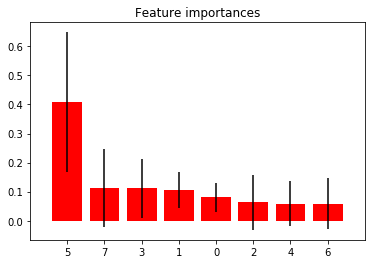

In [84]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for rf in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [90]:
print("1. " + X.columns[5])
print("2. " + X.columns[7])
print("3. " + X.columns[3])
print("4. " + X.columns[1])

1. creation_source_PERSONAL_PROJECTS
2. creation_source_SIGNUP_GOOGLE_AUTH
3. creation_source_GUEST_INVITE
4. enabled_for_marketing_drip
